<a href="https://colab.research.google.com/github/GPaishU632/Machine-Learning-for-Solar-Energy-Prediction/blob/master/Final_solar_prediciton_18_07_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solar energy generation prediciton** 

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('/content/Solar_power_hourly_data_final.csv')

In [ ]:
df


,Date,Time,Solar Energy,Gb(i),Gd(i),Gr(i),Sun height,Temperature,Wind speed,RH,Global irridance on surface,Surface pressure,Hour
0,1.1.20,12:00 AM,0.0,0.00,0.00,0.00,0.00,23.22,1.17,84.32,0.00,100771,0
1,1.1.20,01:00 AM,0.0,6.27,20.74,0.08,5.53,23.02,1.45,85.38,27.09,100850,1
2,1.1.20,02:00 AM,0.0,38.68,96.13,0.42,18.51,23.43,1.45,86.44,135.23,100910,2
3,1.1.20,03:00 AM,0.0,126.64,151.39,0.86,30.74,24.09,1.79,87.51,278.89,100980,3
4,1.1.20,04:00 AM,0.0,310.47,202.50,1.55,41.60,25.33,1.93,88.57,514.52,100990,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30.12.20,07:00 PM,0.0,0.00,0.00,0.00,0.00,23.86,3.93,79.01,0.00,101060,19
8756,30.12.20,08:00 PM,0.0,0.00,0.00,0.00,0.00,23.86,3.72,80.07,0.00,101000,20
8757,30.12.20,09:00 PM,0.0,0.00,0.00,0.00,0.00,23.77,3.79,81.13,0.00,100930,21
8758,30.12.20,10:00 PM,0.0,0.00,0.00,0.00,0.00,24.02,3.72,82.19,0.00,100940,22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         8758 non-null   object 
 1   Time                         8760 non-null   object 
 2   Solar Energy                 8760 non-null   float64
 3   Gb(i)                        8760 non-null   float64
 4   Gd(i)                        8760 non-null   float64
 5   Gr(i)                        8760 non-null   float64
 6   Sun height                   8760 non-null   float64
 7   Temperature                  8760 non-null   float64
 8   Wind speed                   8760 non-null   float64
 9   RH                           8760 non-null   float64
 10  Global irridance on surface  8760 non-null   float64
 11  Surface pressure             8760 non-null   int64  
 12  Hour                         8760 non-null   int64  
dtypes: float64(9), int

In [ ]:
df["Date"]

0         1.1.20
1         1.1.20
2         1.1.20
3         1.1.20
4         1.1.20
          ...   
8755    30.12.20
8756    30.12.20
8757    30.12.20
8758    30.12.20
8759    30.12.20
Name: Date, Length: 8760, dtype: object

In [ ]:
se=df['Solar Energy']
rh =df['RH']
hr = df['Hour']
date = df["Date"]

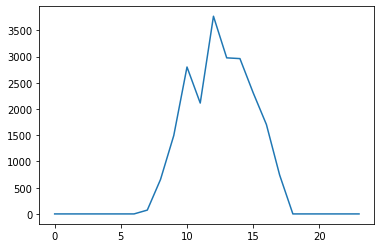

In [ ]:
plt.plot(hr[0:24],se[0:24])

In [ ]:
df1 = pd.DataFrame(df, columns=["Date",	"Time",	"Solar Energy","Gb(i)",	"Gd(i)",	"Gr(i)",	"Sun height",	"Temperature",	"Wind speed","RH","Global irridance on surface",	"Surface pressure","Hour"])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af7f08b90>,
      dtype=object)

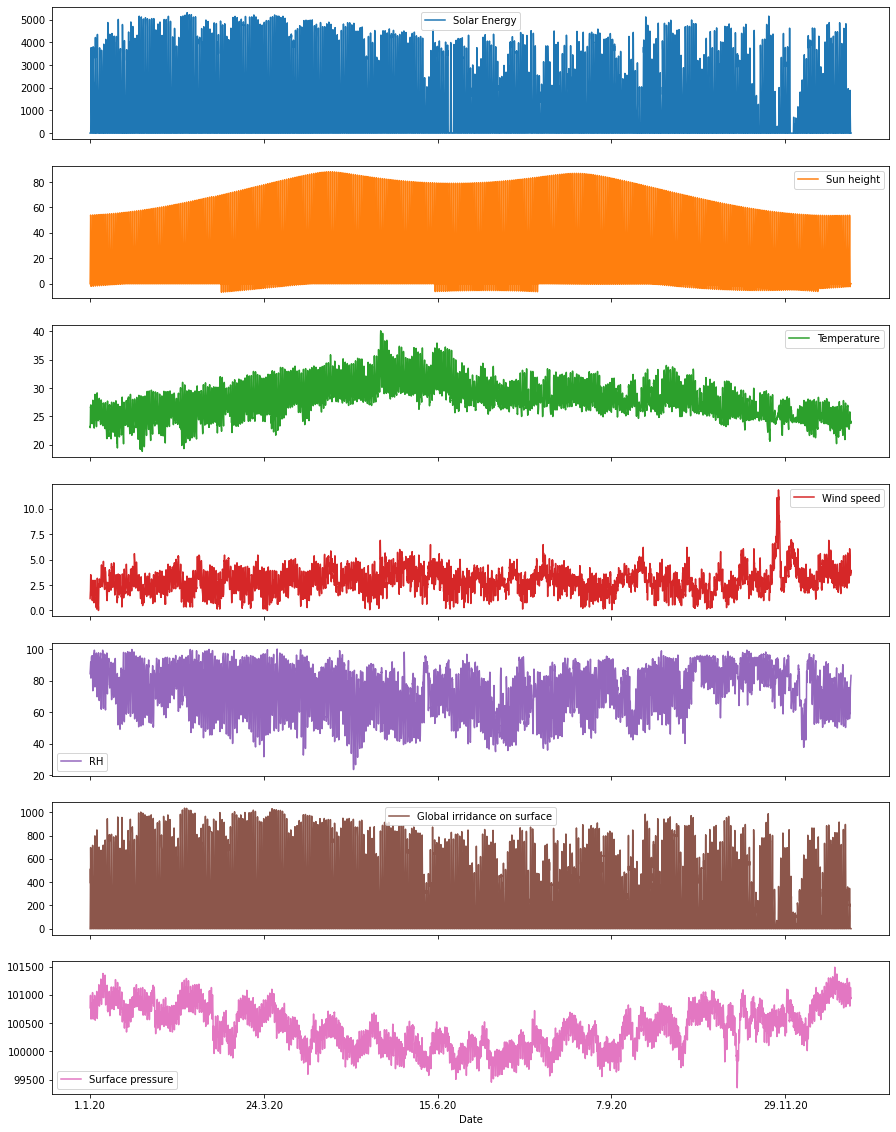

In [ ]:

df.set_index('Date')[["Solar Energy","Sun height","Temperature","Wind speed","RH","Global irridance on surface",	"Surface pressure"]].plot(subplots = 'True',figsize =(15,20))

In [ ]:
df

,Date,Time,Solar Energy,Gb(i),Gd(i),Gr(i),Sun height,Temperature,Wind speed,RH,Global irridance on surface,Surface pressure,Hour
0,1.1.20,12:00 AM,0.0,0.00,0.00,0.00,0.00,23.22,1.17,84.32,0.00,100771,0
1,1.1.20,01:00 AM,0.0,6.27,20.74,0.08,5.53,23.02,1.45,85.38,27.09,100850,1
2,1.1.20,02:00 AM,0.0,38.68,96.13,0.42,18.51,23.43,1.45,86.44,135.23,100910,2
3,1.1.20,03:00 AM,0.0,126.64,151.39,0.86,30.74,24.09,1.79,87.51,278.89,100980,3
4,1.1.20,04:00 AM,0.0,310.47,202.50,1.55,41.60,25.33,1.93,88.57,514.52,100990,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30.12.20,07:00 PM,0.0,0.00,0.00,0.00,0.00,23.86,3.93,79.01,0.00,101060,19
8756,30.12.20,08:00 PM,0.0,0.00,0.00,0.00,0.00,23.86,3.72,80.07,0.00,101000,20
8757,30.12.20,09:00 PM,0.0,0.00,0.00,0.00,0.00,23.77,3.79,81.13,0.00,100930,21
8758,30.12.20,10:00 PM,0.0,0.00,0.00,0.00,0.00,24.02,3.72,82.19,0.00,100940,22


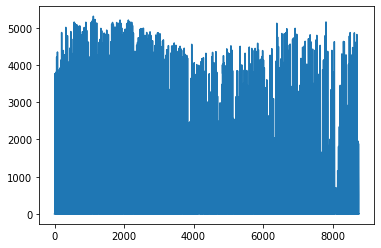

In [ ]:
temp =df["Solar Energy"]
temp.plot()

In [ ]:
temp

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Solar Energy, Length: 8760, dtype: float64

In [ ]:
len(temp)


8760

In [ ]:
def scaler(x):
  z = (x-np.min(x))/(np.max(x)-np.min(x))
  return z

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = df['Solar Energy'].values.reshape(-1, 1)
xmin = np.min(x)
xmax= np.max(x)
temp4=scaler(x)

In [ ]:
def rescale(y):
  a= (y*(xmax-xmin))+xmin
  return a

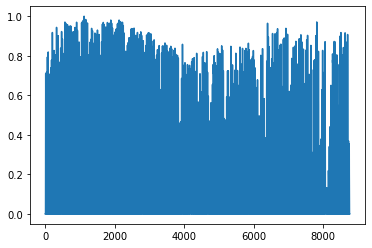

In [ ]:
temp4
import matplotlib.pyplot as plt
plt.plot(temp4)
plt.show()
temp5 = rescale(temp4)


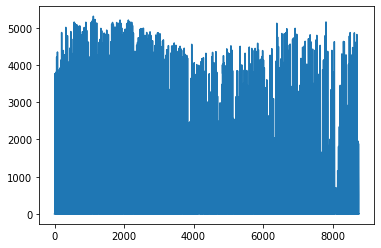

In [ ]:
plt.plot(temp5)
plt.show()

In [ ]:
len(temp4)



8760

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp4, WINDOW_SIZE)
X1.shape, y1.shape
X1 = X1.reshape((X1.shape[0], X1.shape[1],1))
y1 = y1.reshape((y1.shape[0], ))


In [ ]:
X1.shape, y1.shape

((8755, 5, 1), (8755,))

In [ ]:
X_train1, y_train1 = X1[:6000], y1[:6000]
X_val1, y_val1 = X1[1000:7000], y1[1000:7000]
X_test1, y_test1 = X1, y1
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6000, 5, 1), (6000,), (6000, 5, 1), (6000,), (8755, 5, 1), (8755,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=25,batch_size=24, callbacks=[cp1])

Epoch 1/25
247/250 [============================>.] - ETA: 0s - loss: 0.0242 - root_mean_squared_error: 0.1556

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 8s 27ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0829
Epoch 2/25
242/250 [============================>.] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0770

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0711
Epoch 3/25
242/250 [============================>.] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0644

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 29ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0612
Epoch 4/25
250/250 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0586

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 29ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 5/25
247/250 [============================>.] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0567

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 6/25
248/250 [============================>.] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0542

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 6s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 7/25
249/250 [============================>.] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0521

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506
Epoch 8/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0024 - root_mean_squared_error: 0.0495 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 9/25
246/250 [============================>.] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0488

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 6s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 10/25
240/250 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0474

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 28ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 11/25
239/250 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0471

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 6s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 12/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0021 - root_mean_squared_error: 0.0458 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 13/25
241/250 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0452

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 28ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 14/25
248/250 [============================>.] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0450

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 15/25
250/250 [==============================] - 1s 6ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 16/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 17/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 18/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 19/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0025 - val_root_

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0445
Epoch 21/25
250/250 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0429

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


250/250 [==============================] - 7s 28ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 22/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 23/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0422 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0445
Epoch 24/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 25/25
250/250 [==============================] - 2s 7ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
#train_predicitons= rescale(train_predictions)
#y_train1 = rescale(y_train1)
#y_test1 = rescale(y_test1)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.005465,0.000000
1,0.005465,0.000000
2,0.005465,0.013704
3,0.061059,0.123801
4,0.311553,0.281388
...,...,...
5995,0.005465,0.000000
5996,0.005465,0.000000
5997,0.005465,0.000000
5998,0.005465,0.000000


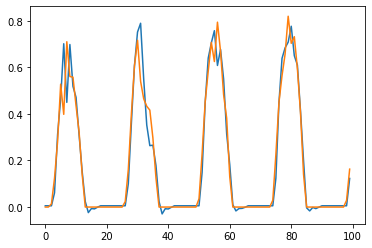

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][0:100])
plt.plot(train_results['Actuals'][0:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,-0.011639,0.000000
1,-0.001537,0.000000
2,0.000044,0.000000
3,0.005465,0.000000
4,0.005465,0.000000
...,...,...
5995,0.076667,0.096458
5996,0.041883,0.019226
5997,-0.009147,0.000000
5998,-0.010801,0.000000


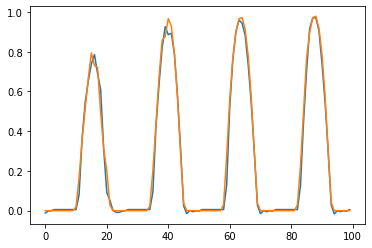

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()


In [ ]:
test_predictions_scaled = rescale(test_predictions)
y_test2 = rescale(y_test1)


In [ ]:
predicted = test_predictions_scaled

In [ ]:
original = y_test2

In [ ]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions_scaled, 'Actuals':y_test2})
test_results

,Test Predictions,Actuals
0,29.028629,0.00
1,29.028629,0.00
2,29.028629,72.80
3,324.356018,657.65
4,1655.021973,1494.78
...,...,...
8750,-27.590984,0.00
8751,-40.469986,0.00
8752,0.732527,0.00
8753,29.028629,0.00


In [ ]:
!pip install.packages("caret")

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install.packages("caret")'


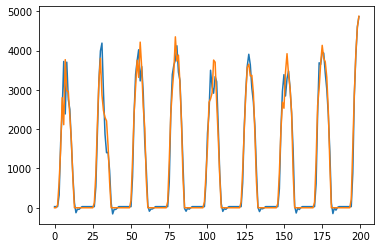

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

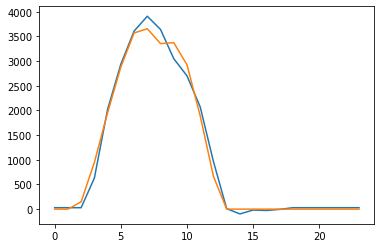

In [ ]:
plt.plot(hr[120:144],test_results['Test Predictions'][120:144])
plt.plot(hr[120:144],test_results['Actuals'][120:144])

In [ ]:
from sklearn import metrics

# Predict
pred = model1.predict(X_test1)
pred
# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test1)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.002107143350638635


In [ ]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.04590363112694501


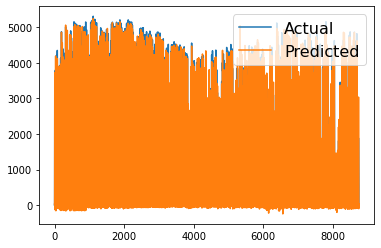

Mean Squared Error : 0.002107143350638635
Mean squared Error after  scaling: 59461.571192569514


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#plt.figure(figsize=(25,6))
plt.plot(y_test2, label='Actual')
plt.plot(test_predictions_scaled, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',metrics.mean_squared_error(y_test1, test_predictions))


In [ ]:
pd.DataFrame(test_results).to_csv("Solar_predicted.csv")


In [ ]:
from google.colab import files
files.download("Solar_predicted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>